### Task No: 01

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_path = 'sales_data.csv'
sales_data = pd.read_csv(file_path)

In [9]:
missing_values = sales_data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Customer ID     0
Order ID        0
Order Date      0
Product ID      0
Product Name    0
Category        0
Quantity        0
Unit Price      0
Region          0
Total Amount    0
dtype: int64


In [10]:
duplicates = sales_data.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


### Task No: 02

In [11]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors='coerce')

In [12]:
sales_data.head()

,Customer ID,Order ID,Order Date,Product ID,Product Name,Category,Quantity,Unit Price,Region,Total Amount
0,8a80ddb1-8615-4452-adce-db56c9385365,d929f0c8-5600-456b-9360-ae114e339871,2021-12-25,9c485900-229d-4b96-ac99-374754d40e1c,T-shirt,Accessories,2,55.23,North,110.46
1,ac664d43-893a-47a1-bdd7-139f73a360a7,38d57142-b1f3-4b25-ae2e-e7404d2df736,2022-10-08,3ff68652-ba71-4610-9284-71f778fd2819,Smartphone,Clothing,1,217.55,South,217.55
2,ebbc4ba3-d24f-4e25-a585-15c8e6bacbd7,58a7f2a2-5682-4510-b94e-cb56d076880d,2022-11-30,99ad1f2f-fa2e-4b27-8952-7b23249eeebc,T-shirt,Books,5,145.57,West,727.85
3,5f3f88e8-b638-4cfd-9af8-e14b63d9082f,12af190c-f3a3-4209-b7a7-fa7a66337df8,2023-02-12,b767b606-a5c1-46fc-83fa-78de163b8fce,Watch,Clothing,4,11.74,North,46.96
4,2029cf6c-dd8e-430c-ae24-586d3a5f422a,d283a232-0b04-49e9-bad3-6dcfd115b421,2023-02-17,15baeab4-63b9-4b98-a52f-40697bcd0c0f,Watch,Accessories,4,387.85,East,1551.40


In [13]:
# Step 1: Calculate RFM metrics
# Set reference date (e.g., the last day in the dataset)
reference_date = sales_data['Order Date'].max() + pd.DateOffset(1)

In [14]:

# Recency: Days since the last purchase
rfm_recency = sales_data.groupby('Customer ID')['Order Date'].max().reset_index()
rfm_recency['Recency'] = (reference_date - rfm_recency['Order Date']).dt.days

In [15]:
# Frequency: Number of purchases
rfm_frequency = sales_data.groupby('Customer ID')['Order ID'].count().reset_index()
rfm_frequency.columns = ['Customer ID', 'Frequency']

In [16]:
# Monetary: Total amount spent by each customer
rfm_monetary = sales_data.groupby('Customer ID')['Total Amount'].sum().reset_index()
rfm_monetary.columns = ['Customer ID', 'Monetary']

In [17]:
# Step 2: Merge the RFM metrics
rfm = rfm_recency.merge(rfm_frequency, on='Customer ID').merge(rfm_monetary, on='Customer ID')

In [18]:
# Step 3: Create RFM segments
# Divide Recency, Frequency, and Monetary into quartiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

In [19]:
# Combine the RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [20]:
# Step 4: Segment customers based on RFM score
def rfm_segment(row):
    if row['RFM_Score'] == '444':
        return 'High-Value Customer'
    elif row['RFM_Score'][0] == '4':
        return 'Loyal Customer'
    elif row['RFM_Score'][1] == '1':
        return 'At-Risk Customer'
    elif row['RFM_Score'][2] == '1':
        return 'Low-Spending Customer'
    else:
        return 'New Customer'

rfm['Customer Segment'] = rfm.apply(rfm_segment, axis=1)

<ipython-input-54-6f372645206c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Customer Segment', order=rfm['Customer Segment'].value_counts().index, palette='viridis')


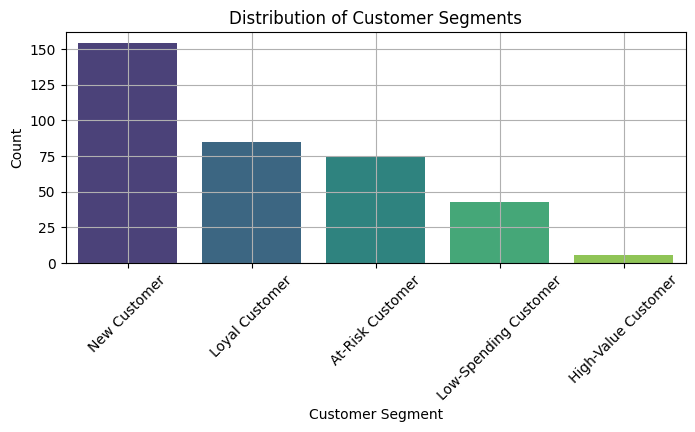

In [54]:
# Countplot for 'Customer Segment'
plt.figure(figsize=(8, 3))
sns.countplot(data=rfm, x='Customer Segment', order=rfm['Customer Segment'].value_counts().index, palette='viridis')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**SALES DATA ANALYSIS**

In [55]:
sales_data.head()

,Customer ID,Order ID,Order Date,Product ID,Product Name,Category,Quantity,Unit Price,Region,Total Amount,Year,Month
0,8a80ddb1-8615-4452-adce-db56c9385365,d929f0c8-5600-456b-9360-ae114e339871,2021-12-25,9c485900-229d-4b96-ac99-374754d40e1c,T-shirt,Accessories,2,55.23,North,110.46,2021,2021-12
1,ac664d43-893a-47a1-bdd7-139f73a360a7,38d57142-b1f3-4b25-ae2e-e7404d2df736,2022-10-08,3ff68652-ba71-4610-9284-71f778fd2819,Smartphone,Clothing,1,217.55,South,217.55,2022,2022-10
2,ebbc4ba3-d24f-4e25-a585-15c8e6bacbd7,58a7f2a2-5682-4510-b94e-cb56d076880d,2022-11-30,99ad1f2f-fa2e-4b27-8952-7b23249eeebc,T-shirt,Books,5,145.57,West,727.85,2022,2022-11
3,5f3f88e8-b638-4cfd-9af8-e14b63d9082f,12af190c-f3a3-4209-b7a7-fa7a66337df8,2023-02-12,b767b606-a5c1-46fc-83fa-78de163b8fce,Watch,Clothing,4,11.74,North,46.96,2023,2023-02
4,2029cf6c-dd8e-430c-ae24-586d3a5f422a,d283a232-0b04-49e9-bad3-6dcfd115b421,2023-02-17,15baeab4-63b9-4b98-a52f-40697bcd0c0f,Watch,Accessories,4,387.85,East,1551.40,2023,2023-02


### Task No: 03

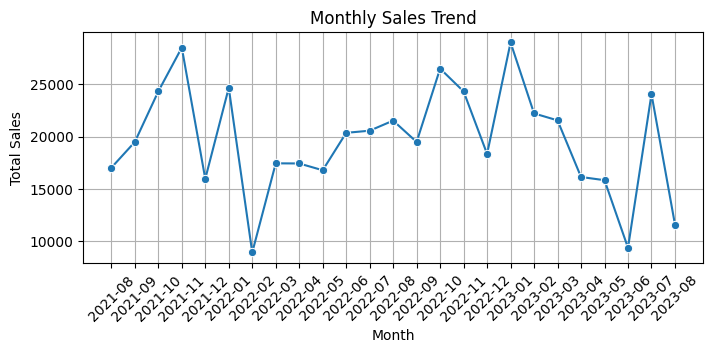

In [42]:
# Ensure 'Order Date' is in datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.to_period('M')

# Group sales data by year and month to get total sales
monthly_sales = sales_data.groupby('Month')['Total Amount'].sum().reset_index()

# Convert 'Month' to string for plotting
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Plot monthly sales trend
plt.figure(figsize=(8, 3))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()


### Task No: 04

<ipython-input-43-bc0577c64068>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Total Amount', y='Category', palette='viridis')


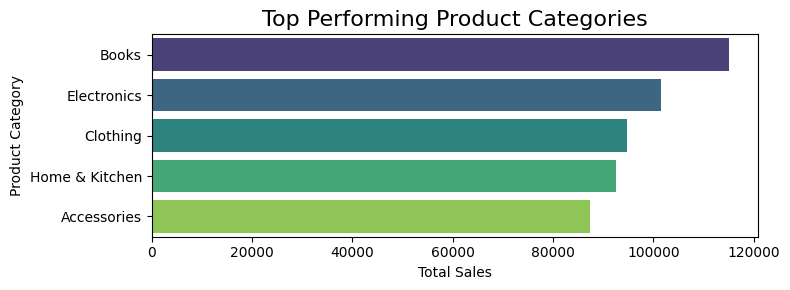

In [43]:
# Task 2: Bar Chart for Top Product Categories
category_sales = sales_data.groupby('Category')['Total Amount'].sum().reset_index().sort_values(by='Total Amount', ascending=False)

plt.figure(figsize=(8, 3))
sns.barplot(data=category_sales, x='Total Amount', y='Category', palette='viridis')
plt.title('Top Performing Product Categories', fontsize=16)
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

In [38]:
# Task 3: Identify Regions with the Highest Sales
region_sales = sales_data.groupby('Region')['Total Amount'].sum().reset_index().sort_values(by='Total Amount', ascending=False)

<ipython-input-45-ef57b533f5f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Total Amount', y='Region', palette='viridis')


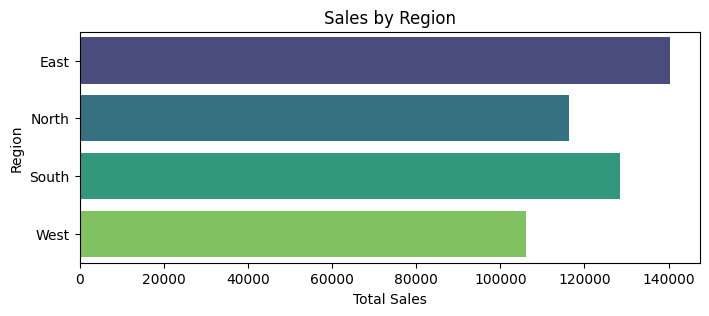

In [45]:
# Plot sales by region
plt.figure(figsize=(8, 3))
sns.barplot(data=region_sales, x='Total Amount', y='Region', palette='viridis')
plt.title('Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()

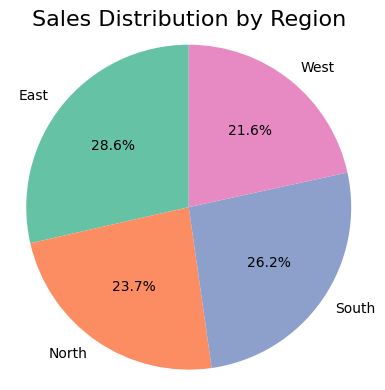

In [51]:
# Task 3: Pie Chart for Regional Sales Distribution
region_sales = sales_data.groupby('Region')['Total Amount'].sum().reset_index()

plt.figure(figsize=(4, 4))
plt.pie(region_sales['Total Amount'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Sales Distribution by Region', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()